<a href="https://colab.research.google.com/github/dragoa/AI/blob/main/ML/00/ERM_and_SRM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
# inizializing random seed generator
np.random.seed(13)

In [ ]:
# oracle for generating the data distribution
def oracle(x):
  return np.abs(np.abs(x-.4)-.2)+x/2-.1

In [ ]:
n = 8 # num of samples


# generating random points
x = np.random.rand(n)
# generating my target, no noise
y = oracle(x)
x = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()

# this is my distribution
nt = 1000
xt = np.linspace(0,1,nt)
yt = oracle(xt)
xt = np.asmatrix(xt).transpose()
yt = np.asmatrix(yt).transpose()

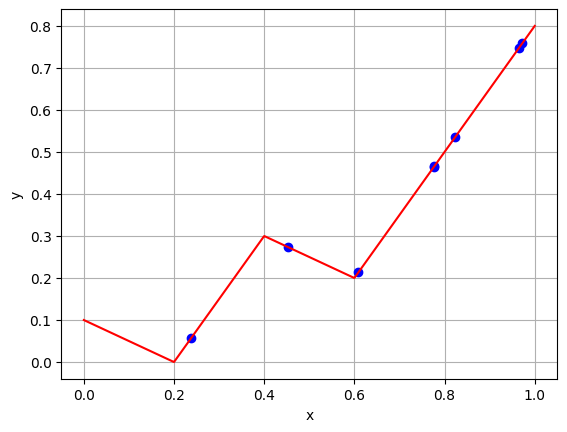

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.set(xlabel='x',ylabel='y')
ax.grid()

In this case I removed the noise because in some specific ML problem noise is not present (image recognition, cause of death).
<br>
- p: degree of the polynomium
- lambda: mesurement of complexity. If I increase lambda then the model is simpler.

Knowing the function generating the distribution deviates you in determing the correct solution and it is completely useless. <br>
You can see it when increasing the error, it Doesn't exist a correct model in ML.

In [ ]:
# SRM - Structural Risk Minimization

p = 11 # degree of the poly > 0
lam = .000001 # lambda between [0, inf)

0.031053416411806773


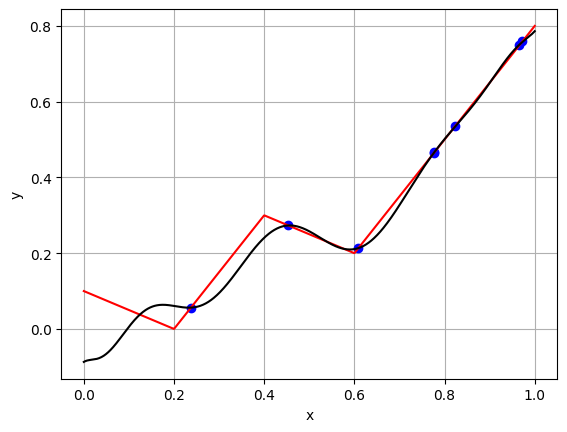

In [ ]:
X = nml.ones((n,1))   # (n,(p+1))
XT = nml.ones((nt,1)) # (nt,(p+1))

for i in range(1,p+1):
  X = np.concatenate((X,np.power(x,i)),axis=1)
  XT = np.concatenate((XT,np.power(xt,i)),axis=1)

M = nml.zeros((p+1,p+1))
for i in range(2,p+1):
  for j in range(2,p+1):
    M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)

# a = (X'*X + lambda*M)\(X'*y)
a = np.linalg.solve(np.matmul(np.transpose(X),X)+lam*M,np.matmul(np.transpose(X),y))
# estimation of the function in each point
yp = np.matmul(XT,a)

# empirical error
err = np.mean(np.abs(yp-yt))
print(err)

# plot the graph
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.plot(xt,yp,'k')
ax.set(xlabel='x',ylabel='y')
ax.grid()

In [ ]:
maxp = 15
lam = .000001
v_err_train  = np.asarray([])
v_err_oracle = np.asarray([])
for p in range(0,maxp):
  X = nml.ones((n,1))
  XT = nml.ones((nt,1))
  for i in range(1,p+1):
    X = np.concatenate((X,np.power(x,i)),axis=1)
    XT = np.concatenate((XT,np.power(xt,i)),axis=1)
  M = nml.zeros((p+1,p+1))
  for i in range(2,p+1):
    for j in range(2,p+1):
      M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)
  a = np.linalg.solve(np.matmul(np.transpose(X),X)+lam*M,np.matmul(np.transpose(X),y))
  yp = np.matmul(XT,a)
  err = np.mean(np.abs(yp-yt))
  v_err_oracle = np.append(v_err_oracle,err)
  yp = np.matmul(X,a)
  err = np.mean(np.abs(yp-y))
  v_err_train = np.append(v_err_train,err)

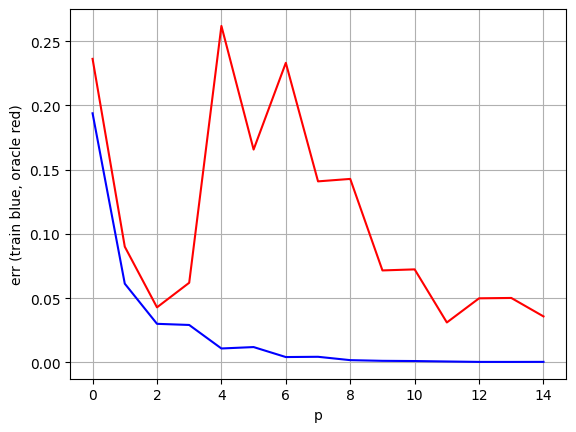

In [ ]:
fig, ax = plt.subplots()
# plot the error on the train
ax.plot(range(0,maxp),v_err_train,'b')
# plot the error on the oracle
ax.plot(range(0,maxp),v_err_oracle,'r')
ax.set(xlabel='p',ylabel='err (train blue, oracle red)')
ax.grid()